In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")

Plot the populations for the years in the period. Add legend and axis labels to the plot.

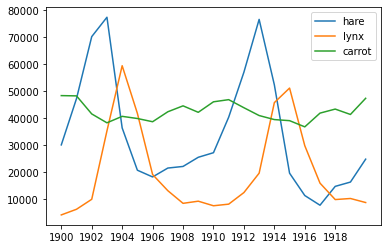

In [6]:
plt.plot(data[:, 0], data[:, 1], label = 'hare')
plt.plot(data[:, 0], data[:, 2], label = 'lynx')
plt.plot(data[:, 0], data[:, 3], label = 'carrot')
plt.xticks(np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 2))
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

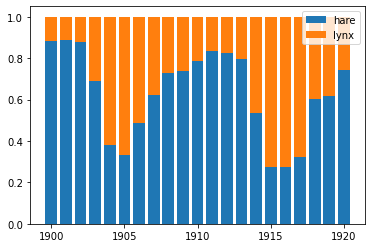

In [7]:
#data[:, (1, 2)] /= np.sum(data[:, 1] + data[:, 2])
sum = data[:, 1] + data[:, 2]
plt.bar(data[:, 0], (data[:, 1] / sum), label = 'hare')
plt.bar(data[:, 0], (data[:, 2] / sum), label = 'lynx', bottom = data[:, 1] / sum)
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

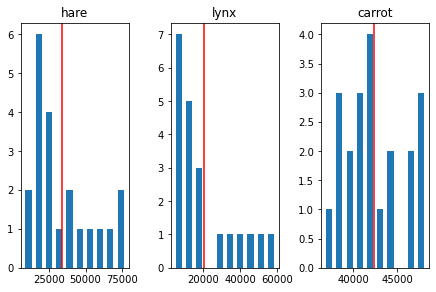

In [8]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data[:, 1], rwidth = 0.6)
axs[0].axvline(np.mean(data[:, 1]), color = 'r')
axs[0].set_title("hare")

axs[1].hist(data[:, 2], rwidth = 0.6)
axs[1].axvline(np.mean(data[:, 2]), color = "r")
axs[1].set_title("lynx")

axs[2].hist(data[:, 3], rwidth = 0.6)
axs[2].axvline(np.mean(data[:, 3]), color = 'r')
axs[2].set_title("carrot")
fig.tight_layout(pad = 0.5)

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

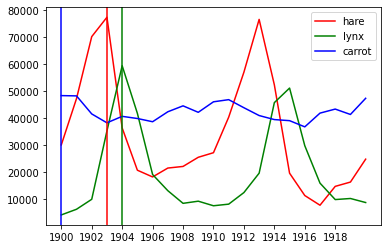

In [9]:
lables = ['hare', 'lynx', 'carrot']
plt.plot(data[:, 0], data[:, 1], label = lables[0], color = 'r')
plt.plot(data[:, 0], data[:, 2], label = lables[1], color = 'g')
plt.plot(data[:, 0], data[:, 3], label = lables[2], color = 'b')
plt.xticks(np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 2))
plt.axvline(data[np.argmax(data[:, 1]), 0], color = 'r')
plt.axvline(data[np.argmax(data[:, 2]), 0], color = 'g')
plt.axvline(data[np.argmax(data[:, 3]), 0], color = 'b')
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


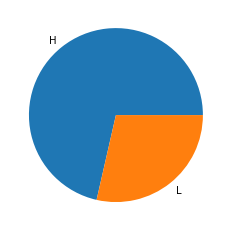

In [10]:
res = np.where(data[:, 1] > data[:, 2], "H", "L")
print(res)
plt.pie([np.count_nonzero(res == 'H'), np.count_nonzero(res == "L")], labels = ['H', 'L'])
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

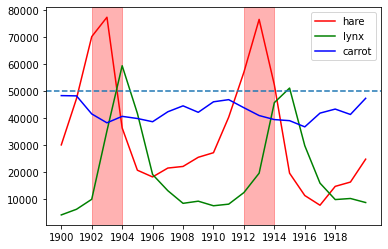

In [11]:
lables = ['hare', 'lynx', 'carrot']
plt.plot(data[:, 0], data[:, 1], label = lables[0], color = 'r')
plt.plot(data[:, 0], data[:, 2], label = lables[1], color = 'g')
plt.plot(data[:, 0], data[:, 3], label = lables[2], color = 'b')
plt.xticks(np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 2))
plt.axhline(50000, linestyle = "--")
xs = data[np.where(data[:, (1, 2, 3)] > 50000)[0], 0]
plt.axvspan(xs[0], xs[2], alpha=0.3, color='red')
plt.axvspan(xs[3], xs[5], alpha=0.3, color='red')
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [12]:
res = {'hare' : data[data[:, 1].argsort()[:2], 0], 
       'lynx' : data[data[:, 2].argsort()[:2], 0],
       'carrot' : data[data[:, 3].argsort()[:2], 0]}
print(res)

{'hare': array([1917., 1916.]), 'lynx': array([1900., 1901.]), 'carrot': array([1916., 1903.])}


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

-0.8941896424901974


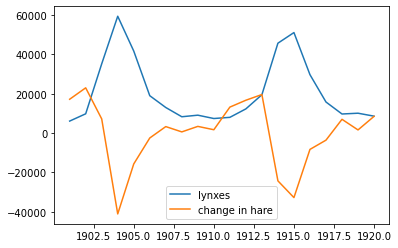

In [38]:
#change = data[-1, 1][-1] - data[:, 1][-len(data[:, 1])]
change = data[1:, 1] - data[:-1, 1]
plt.plot(data[1:, 0], data[1:, 2], label = "lynxes")
plt.plot(data[1:, 0], change, label = "change in hare")
plt.legend()
cov = 1 / (data.shape[0] - 2) * np.dot(change - np.mean(change), data[1:, 2] - np.mean(data[1:, 2]))
corr = cov / (np.std(change) * np.std(data[1:, 2]))
print(corr)

Show population of hares vs carrots and hares vs lynxes.

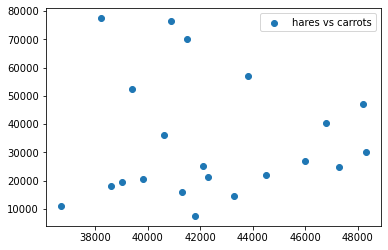

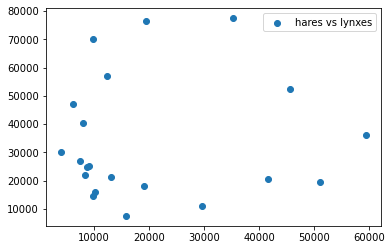

In [44]:
plt.scatter(data[:, 3], data[:, 1], label = "hares vs carrots")
plt.legend()
plt.show()
plt.scatter(data[:, 2], data[:, 1], label = "hares vs lynxes")
plt.legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

1.040889436217988


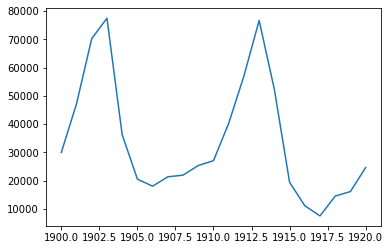

In [57]:
plt.plot(data[:, 0], data[:, 1])
res = data[-2, 1] + data[-1, 2] * corr + change[0]
print(res / data[-1, 1])

In [60]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
images = digits.data.reshape(-1, 8, 8)